# MANUAL NET ARCHITECTURE

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import glob
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from PIL import Image

from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [3]:
A_POSSITIVE = 'DATASET/TRAIN/A-'
A_NEGATIVE = 'DATASET/TRAIN/A+'
AB_POSSITIVE = 'DATASET/TRAIN/AB-'
AB_NEGATIVE = 'DATASET/TRAIN/AB+'

In [4]:
def plot_images(item_dir, n=6):
    all_item_dir = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dir][:n]
    
    plt.figure(figsize=(80, 40))
    for idx, img_path in enumerate(item_files):
        plt.subplot(3, n, idx+1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()
    
def image_details_print(data,path):
    print('======== Images in: ', path)
    for key,values in data.items():
        print(key,':\t', values)


def images_details(path):
    files=[f for f in glob.glob(path + "**/*.*", recursive=True)]
    data={}
    data['Images_count']=len(files)
    data['Min_width']=10**100
    data['Max_width']=0
    data['Min_height']=10**100
    data['Max_height']=0
    
    for f in files:
        img=Image.open(f)
        width,height=img.size
        data['Min_width']=min(width,data['Min_width'])
        data['Max_width']=max(width, data['Max_width'])
        data['Min_height']=min(height, data['Min_height'])
        data['Max_height']=max(height, data['Max_height'])
        
    image_details_print(data,path)


TRAINING DATA FOR A_POSSITIVE:

======== Images in:  DATASET/TRAIN/A-
Images_count :	 250
Min_width :	 96
Max_width :	 241
Min_height :	 103
Max_height :	 298



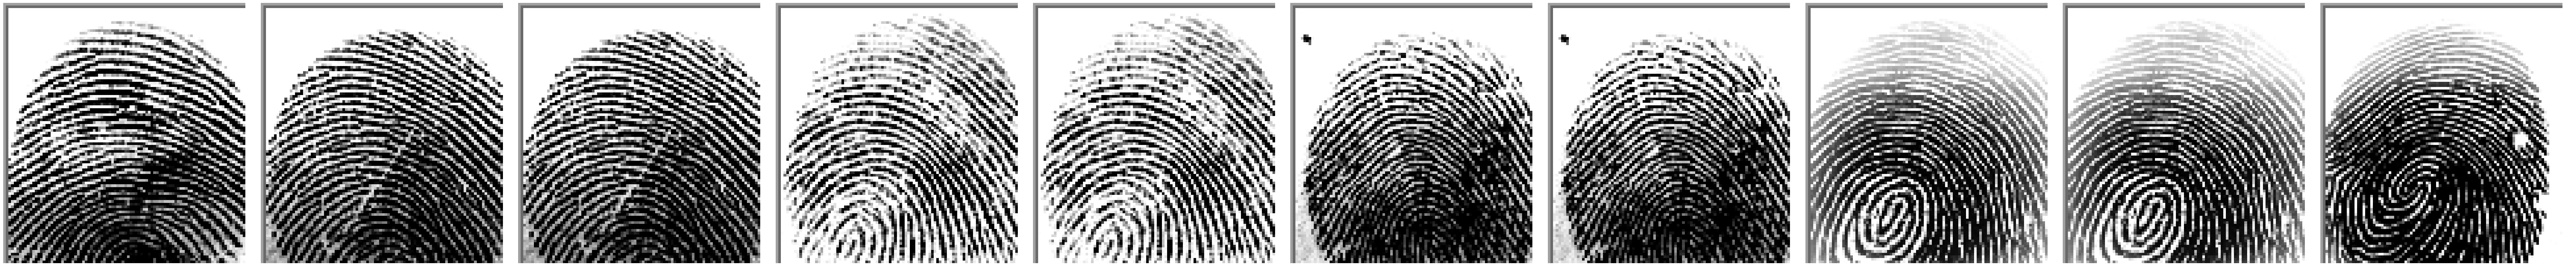

In [5]:
print("")
print("TRAINING DATA FOR A_POSSITIVE:")
print("")
images_details(A_POSSITIVE)
print("")
plot_images(A_POSSITIVE, 10)


TRAINING DATA FOR A_NEGATIVE:

======== Images in:  DATASET/TRAIN/A+
Images_count :	 250
Min_width :	 96
Max_width :	 96
Min_height :	 103
Max_height :	 103



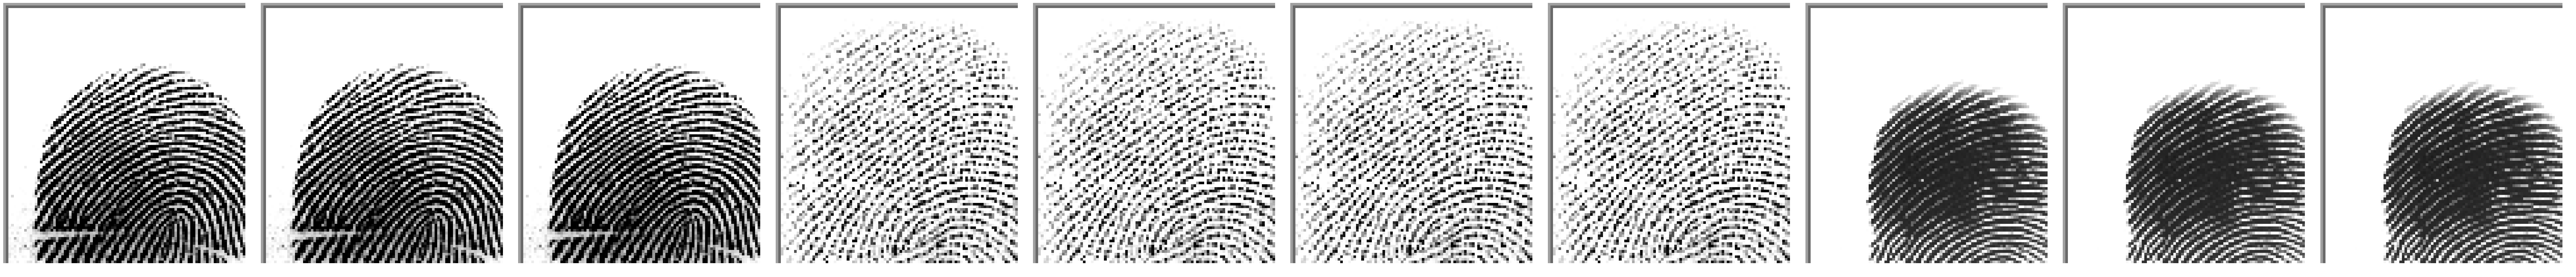

In [6]:
print("")
print("TRAINING DATA FOR A_NEGATIVE:")
print("")
images_details(A_NEGATIVE)
print("")
plot_images(A_NEGATIVE, 10)


TRAINING DATA FOR AB_POSSITIVE:

======== Images in:  DATASET/TRAIN/AB-
Images_count :	 250
Min_width :	 96
Max_width :	 96
Min_height :	 103
Max_height :	 103



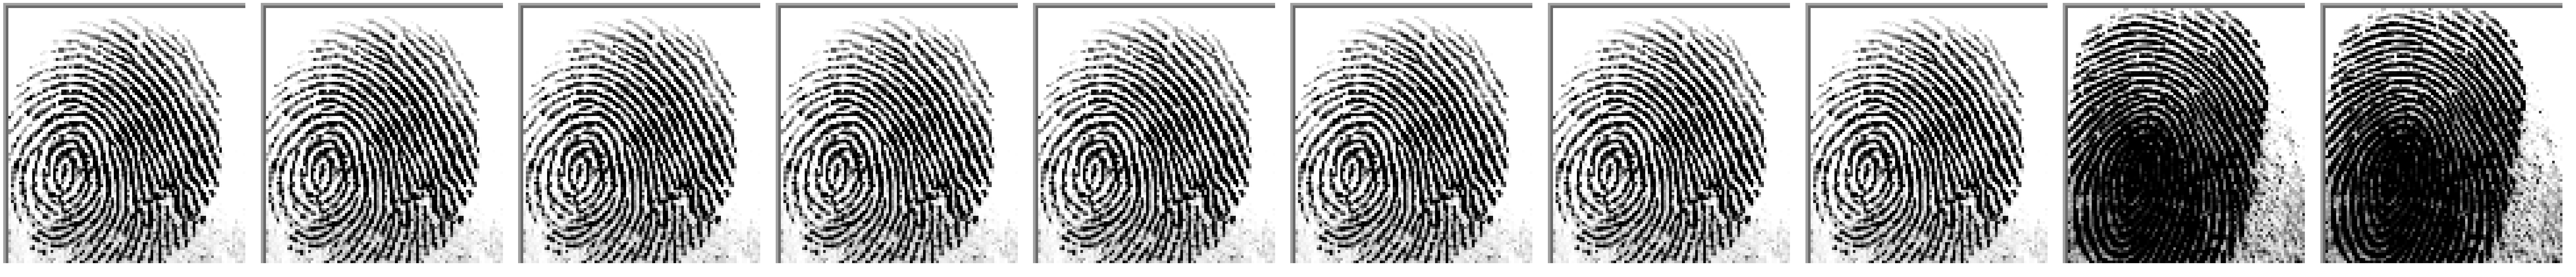

In [7]:
print("")
print("TRAINING DATA FOR AB_POSSITIVE:")
print("")
images_details(AB_POSSITIVE)
print("")
plot_images(AB_POSSITIVE, 10)


TRAINING DATA FOR AB_NEGATIVE:

======== Images in:  DATASET/TRAIN/AB+
Images_count :	 250
Min_width :	 96
Max_width :	 96
Min_height :	 103
Max_height :	 103



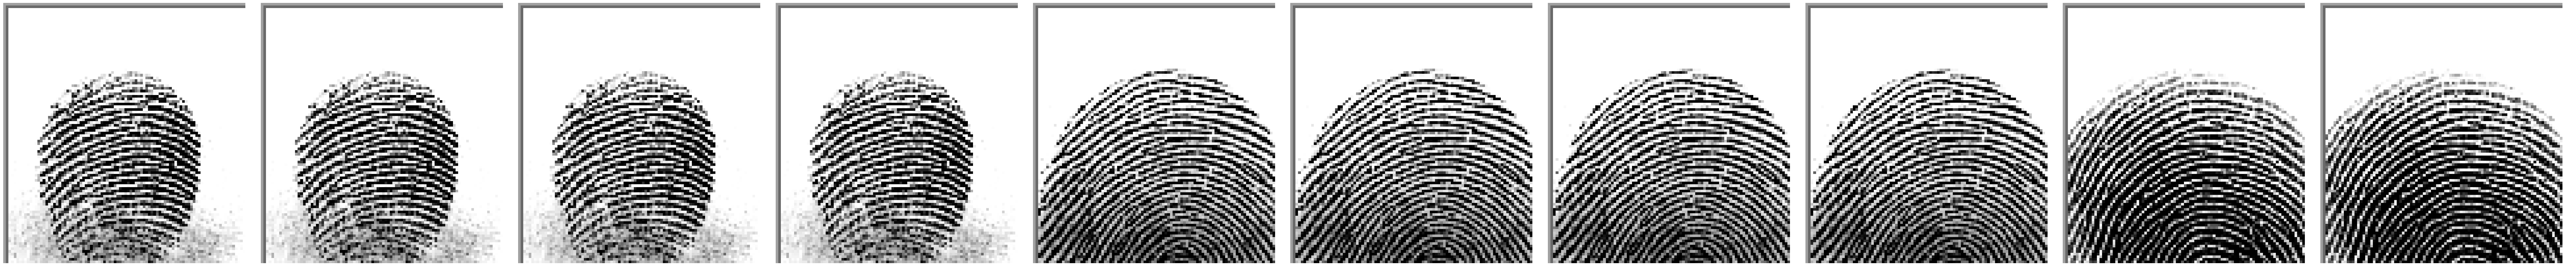

In [8]:
print("")
print("TRAINING DATA FOR AB_NEGATIVE:")
print("")
images_details(AB_NEGATIVE)
print("")
plot_images(AB_NEGATIVE, 10)

In [9]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
training_set=train_datagen.flow_from_directory('DATASET/TRAIN',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 2000 images belonging to 8 classes.


In [10]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory('DATASET/TEST',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 2000 images belonging to 8 classes.


In [11]:
Classifier=Sequential()
Classifier.add(Convolution2D(32,(3,3),input_shape=(224,224,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(38, activation='relu'))
Classifier.add(Dense(8, activation='softmax'))
Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
model_path = "MANUAL.h5"

callbacks = [
    ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True)
]

In [13]:
epochs = 10
batch_size = 512

In [14]:
#### Fitting the model
history = Classifier.fit(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size,
           callbacks=callbacks)

Epoch 1/10


3/3 [==============================] - ETA: 0s - loss: 63.4205 - accuracy: 0.1042
Epoch 1: accuracy improved from -inf to 0.10417, saving model to MANUAL.h5
3/3 [==============================] - 6s 2s/step - loss: 63.4205 - accuracy: 0.1042 - val_loss: 70.9435 - val_accuracy: 0.1146
Epoch 2/10
3/3 [==============================] - ETA: 0s - loss: 49.6224 - accuracy: 0.1562
Epoch 2: accuracy improved from 0.10417 to 0.15625, saving model to MANUAL.h5
3/3 [==============================] - 4s 2s/step - loss: 49.6224 - accuracy: 0.1562 - val_loss: 46.3105 - val_accuracy: 0.0938
Epoch 3/10
3/3 [==============================] - ETA: 0s - loss: 26.4046 - accuracy: 0.1146
Epoch 3: accuracy did not improve from 0.15625
3/3 [==============================] - 3s 1s/step - loss: 26.4046 - accuracy: 0.1146 - val_loss: 11.3870 - val_accuracy: 0.1562
Epoch 4/10
3/3 [==============================] - ETA: 0s - loss: 9.4275 - accuracy: 0.1042 
Epoch 4: accuracy did not improve from 0.1

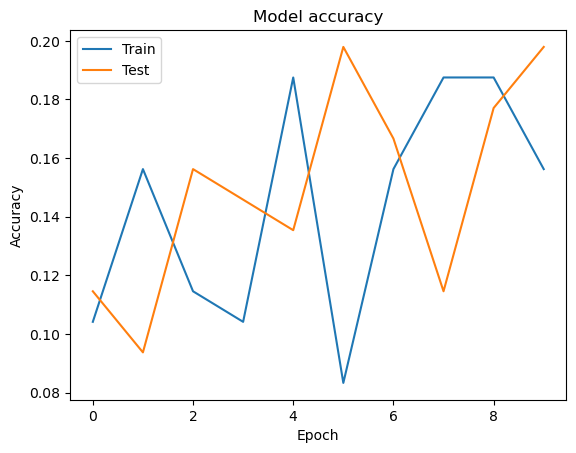

In [15]:
import matplotlib.pyplot as plt

def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

graph()

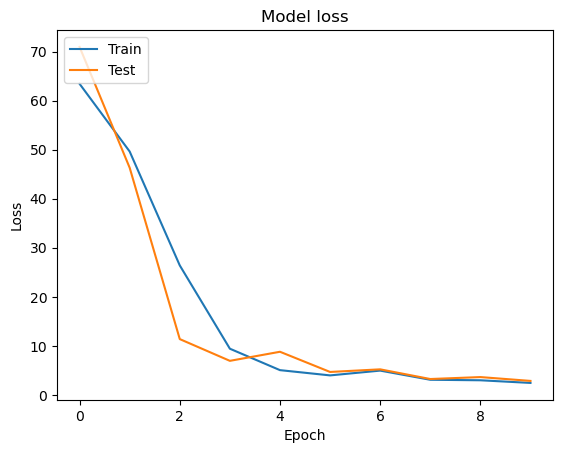

In [16]:
import matplotlib.pyplot as plt

def graph():
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
graph()